## Energía Inteligente: Detección y clasificación de fallas en el sistema de transmisión de energía eléctrica utilizando redes neuronales

- Estela Monserrat Arriaga Santana

- Julián Rosas Scull

## EDA (Exploratory Data Analysis)

In [2]:
# Sirve para que no salgan los warnings de tipo FutureWarning, para algunas graficas de matplotlib
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [1]:
# pandas se utiliza para manipulación de datos y lectura de los datos
import pandas as pd

In [3]:
# Cargar los datos
df = pd.read_csv("./data/classData.csv")
# Mostar los primeros 5 registros
df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


## Análisis de la base

In [74]:
# Cantidad total de observaciones
print("Cantidad total de observaciones: ", df.shape[0])


Cantidad total de observaciones:  7861


## Columnas e instancias

In [4]:
# Cantidad de columnas e instancias
num_columns = df.shape[1]
num_instances = df.shape[0]
print(f"Cantidad de columnas: {num_columns}")
print(f"Cantidad de instancias: {num_instances}")

# Tipo de dato de cada columna
data_types = df.dtypes
data_types

Cantidad de columnas: 10
Cantidad de instancias: 7861


G       int64
C       int64
B       int64
A       int64
Ia    float64
Ib    float64
Ic    float64
Va    float64
Vb    float64
Vc    float64
dtype: object

## Cantidad de columnas por tipo de dato

In [76]:
# Cantidad de columnas por tipo de dato
data_types.value_counts()

float64    6
int64      4
Name: count, dtype: int64

Nuestras columnas dependen de 2 tipos de datos, enteros y flotantes. Por lo que va a hacer crucial para la manipulación de los datos convertir los tipos enteros a tipos flotantes. Esto para comparar variables objetivos, etc.

## Cantidad de Columnas e Instancias y Tipo de Dato de Cada Columna

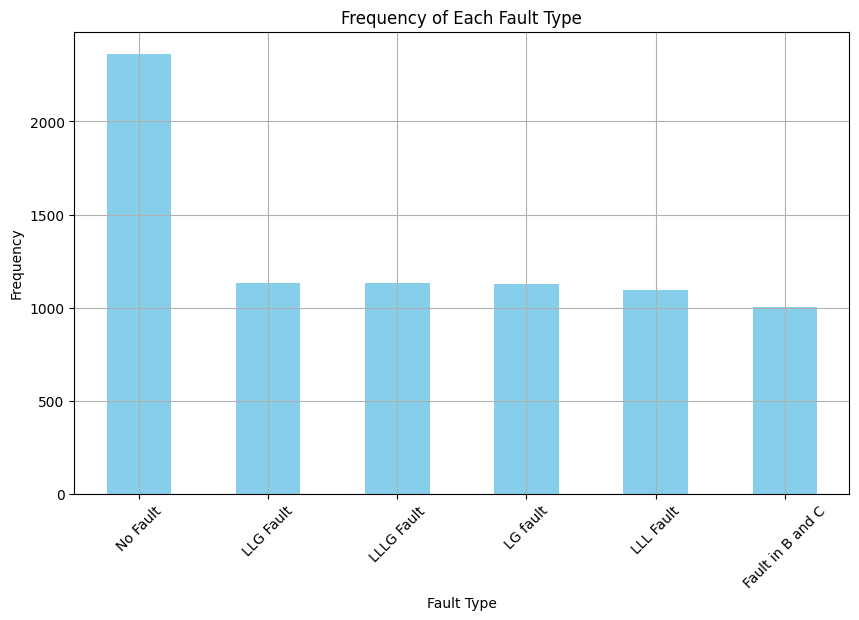

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

def classify_fault(row):
    G, C, B, A = row['G'], row['C'], row['B'], row['A']
    if (G, C, B, A) == (0, 0, 0, 0): 
        return 'No Fault'
    elif (G, C, B, A) == (1, 0, 0, 1): 
        return 'LG fault'
    elif (G, C, B, A) == (0, 0, 1, 1): 
        return 'LL fault'
    elif (G, C, B, A) == (1, 0, 1, 1): 
        return 'LLG Fault'
    elif (G, C, B, A) == (0, 1, 1, 1): 
        return 'LLL Fault'
    elif (G, C, B, A) == (1, 1, 1, 1):
        return 'LLLG Fault'
    elif (G,C,B,A) == (0,1,1,0):
        return 'Fault in B and C'

# Apply this function to each row
df['Fault Type'] = df.apply(classify_fault, axis=1)
# Count the occurrences of each fault type
fault_counts = df['Fault Type'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
fault_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Fault Type')
plt.xlabel('Fault Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

Como podemos ver hay una gran diferencia entre la distribucion de líneas de transmisión que no tuvieron falla, que las que si tuvieron en sus diversas fases. Siendo así, una diferencia del mas del doble entre ellas. Notemos de igual manera que las que si tuvieron error en alguna de sus fases estan bien balanceadas, variando en aproximadamente ~100 cada una.

Así mismo, existe una configuración la cual no etsa siendo considerada en el dataset pero que nosotros la ponemos, y es la de (0,1,1,0), la cual indica que hubo una falla en la fase B y C. 

Estos dos problemas son el inicio de nuestra limpieza de datos, ya que nos indica primeramente que hay que realizar una estratificación entre la clase que no hubo falla y las que si, y que la configuración (0,1,1,0) según el dataset no es válida, por lo que hay que escoger si investigar más del tema y el porqué no es válida o si solo no fue considerada, o bien omitir todos los ejemplares con esta configuración.

## Identificación de datos faltantes

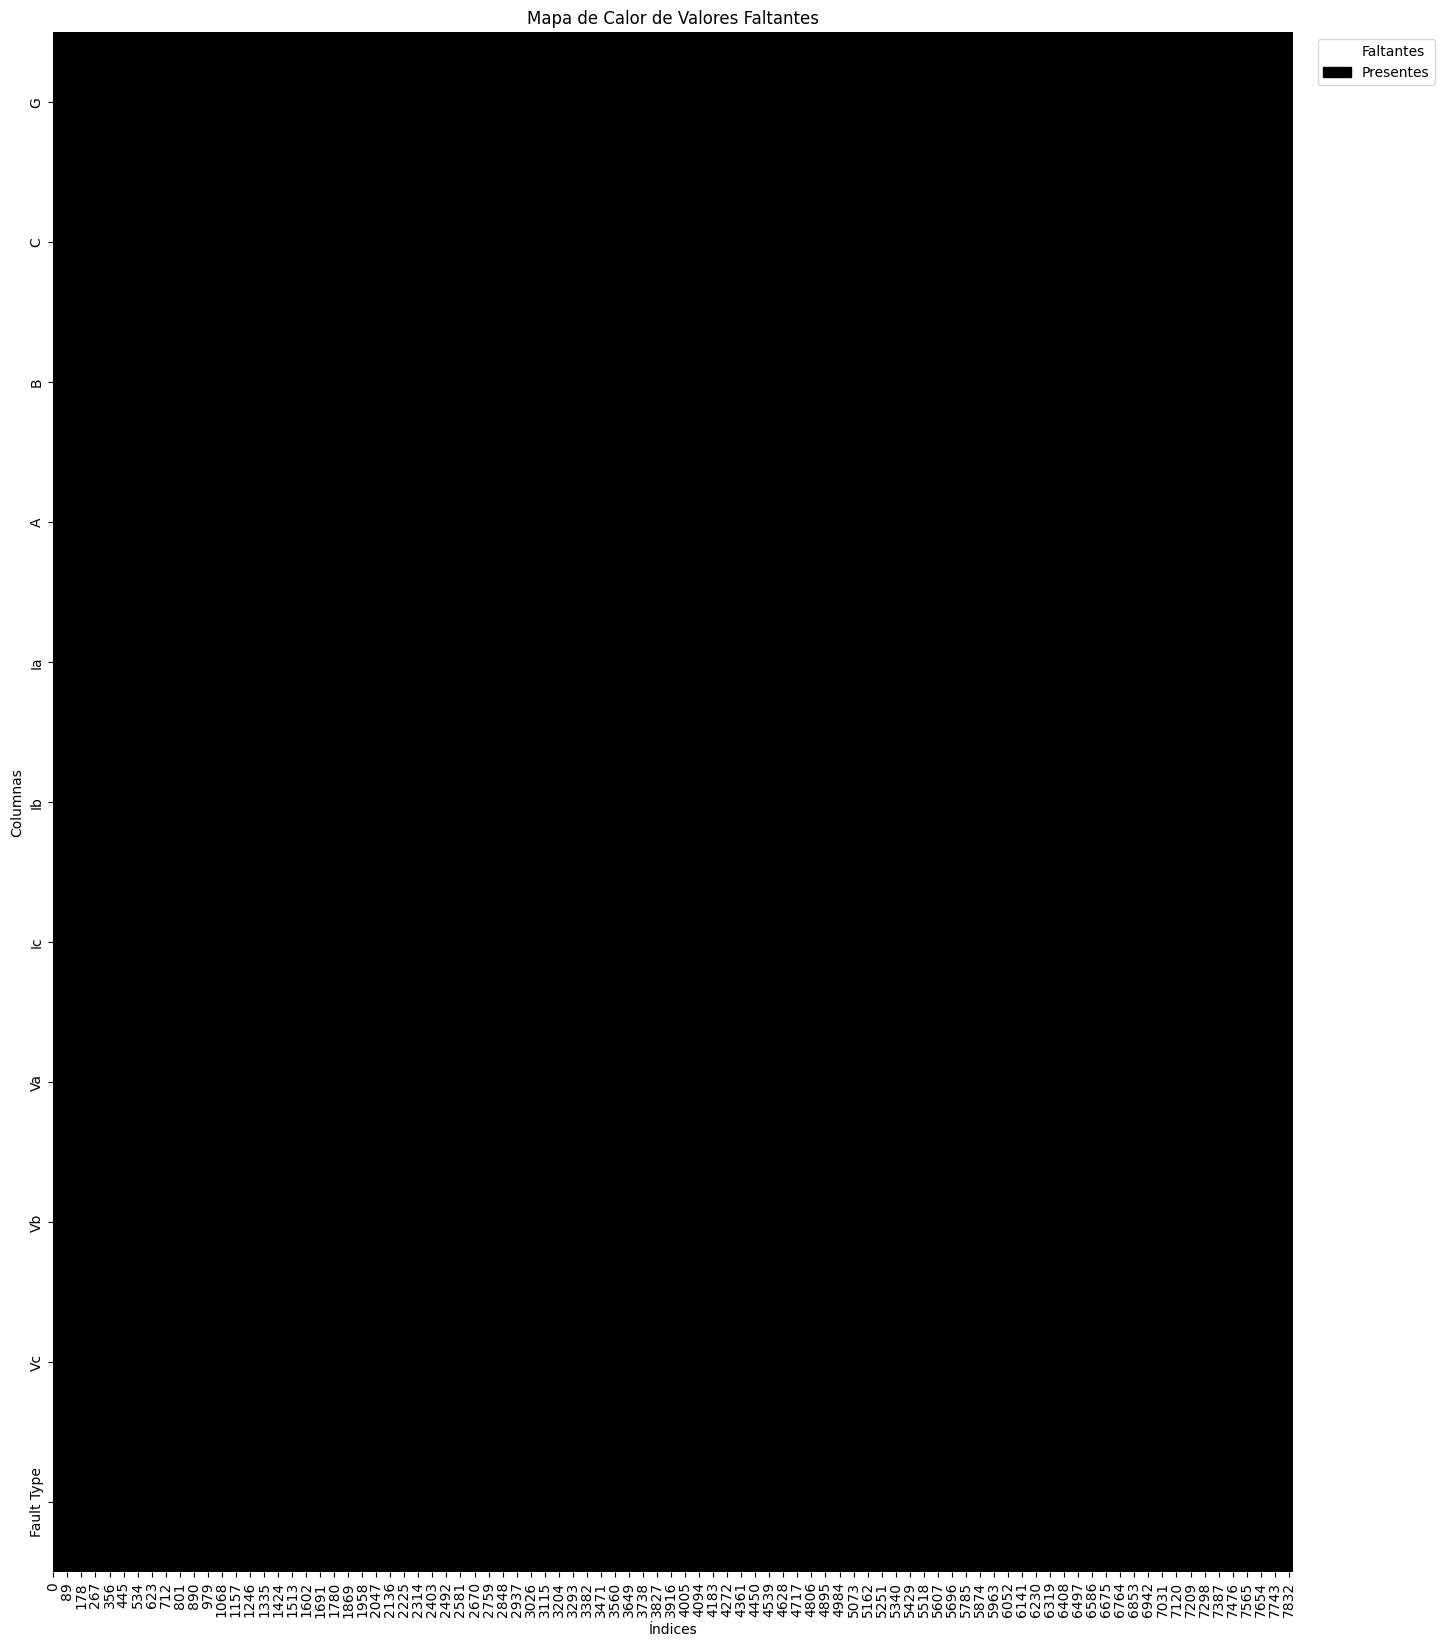

In [78]:
import matplotlib.patches as mpatches

# Mapa de calor invertido con todas las columnas y leyenda
plt.figure(figsize=(16, 20))
sns.heatmap(df.isnull().transpose(), cbar=False, cmap="binary_r", yticklabels=True)
plt.title("Mapa de Calor de Valores Faltantes")
plt.xlabel("Índices")
plt.ylabel("Columnas")

# Añadir leyenda
legend_labels = [
    mpatches.Patch(color="white", label="Faltantes"),
    mpatches.Patch(color="black", label="Presentes"),
]
plt.legend(handles=legend_labels, loc="upper right", bbox_to_anchor=(1.12, 1))
plt.show()

Considerando la información de arriba, podemos notar que no existen los valores nulos.
No obstante, este enfoque visual sirve principalmente como una inspección general. Para un análisis más detallado de los datos faltantes, es recomendable emplear otras herramientas específicas.

In [79]:
# Cantidad de valores faltantes por columna
missing_values = df.isnull().sum()
# Imprimir cantidad de valores faltantes
print(missing_values)

G             0
C             0
B             0
A             0
Ia            0
Ib            0
Ic            0
Va            0
Vb            0
Vc            0
Fault Type    0
dtype: int64


# Rango de columnas



In [80]:
# Obtener columnas numéricas
numeric_cols = df.select_dtypes(include=["number"]).columns

# Calcular y mostrar rangos
ranges = df[numeric_cols].agg(["min", "max"])
ranges

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
min,0,0,0,0,-883.542316,-900.526951,-883.357762,-0.620748,-0.608016,-0.612709
max,1,1,1,1,885.738571,889.868884,901.274261,0.595342,0.627875,0.600179


Notando que nuestro conjunto de entrenamiento (y por ende de entrada) varía por cada columna uniformemente en aproximadamente 2 veces su valor. Y que existe tanto valores muy grandes como valores muy pequeños, por lo que ésto nos dice que debe de existir una normalización con la finalidad de facilitar el entrenamiento y no haya problemas de desvanecimiento en el descenso por el gradiente.

# Matriz de Correlación

In [81]:
# Obtener columnas categóricas, para saber cuales quitar
categorical_cols = df.select_dtypes(include=["object"]).columns

# Quedarse con las columnas numéricas solamente, pero no asignar a df
# La variable numeric_cols la obtuvimos en un paso anterior.
df_numeric = df[numeric_cols]

# Imprimir la cantidad de columnas numéricas
print(f"Cantidad de columnas numéricas: {df_numeric.shape[1]}")

# Matriz de correlación usando pandas
correlation_matrix = df_numeric.corr()
# Mostrar matriz de correlación
correlation_matrix

Cantidad de columnas numéricas: 10


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
G,1.000000,-0.137611,0.196609,0.755273,0.041310,-0.031068,-0.003156,0.023808,-0.024048,0.002122
C,-0.137611,1.000000,0.747612,0.199335,0.000232,-0.109211,0.164323,0.018188,-0.068840,0.052998
B,0.196609,0.747612,1.000000,0.448807,0.014102,-0.139981,0.133321,0.037128,-0.075973,0.042473
A,0.755273,0.199335,0.448807,1.000000,0.036341,-0.074905,0.054071,0.029940,-0.053036,0.025873
Ia,0.041310,0.000232,0.014102,0.036341,1.000000,-0.374241,-0.276457,0.035682,-0.274612,0.246043
Ib,-0.031068,-0.109211,-0.139981,-0.074905,-0.374241,1.000000,-0.528291,0.029118,0.032101,-0.060023
Ic,-0.003156,0.164323,0.133321,0.054071,-0.276457,-0.528291,1.000000,-0.069137,-0.056967,0.122919
Va,0.023808,0.018188,0.037128,0.029940,0.035682,0.029118,-0.069137,1.000000,-0.480247,-0.450225
Vb,-0.024048,-0.068840,-0.075973,-0.053036,-0.274612,0.032101,-0.056967,-0.480247,1.000000,-0.566986
Vc,0.002122,0.052998,0.042473,0.025873,0.246043,-0.060023,0.122919,-0.450225,-0.566986,1.000000


Representada visualmente


<Axes: title={'center': 'Matriz de Correlación'}>

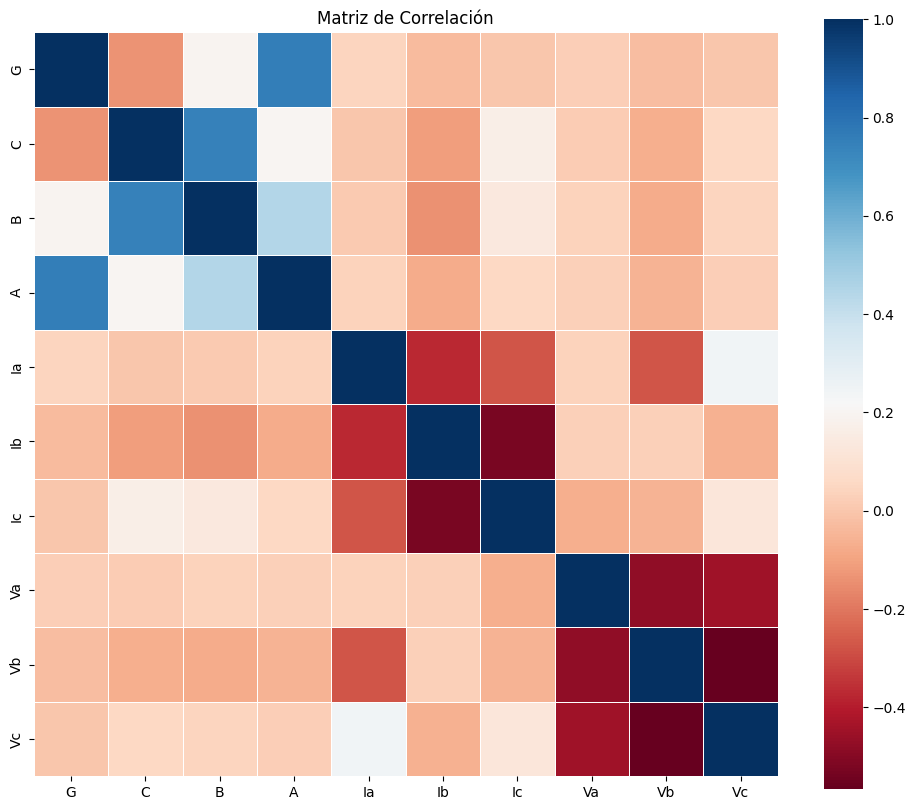

In [82]:
# Visualización de la matriz de correlación
plt.figure(figsize=(12, 10))
plt.title("Matriz de Correlación")
# Add heatmap with grid
sns.heatmap(
    correlation_matrix,  # Matriz de correlación
    cmap="RdBu",  # Color con gradiente de rojo a azul
    annot=False,  # No mostrar valores en las celdas, se puede cambiar a True
    square=True,  # Hacer los cuadrados iguales
    linecolor="white",  # Color de las líneas que separan las celdas
    linewidths=0.5,  # Grosor de las líneas que separan las celdas
)

# Transformando el resultado a One Hot 

In [84]:
def tranform_output(row):
    G, C, B, A = row['G'], row['C'], row['B'], row['A']
    if (G, C, B, A) == (0, 0, 0, 0): 
        return 0
    elif (G, C, B, A) == (1, 0, 0, 1): 
        return 1
    elif (G, C, B, A) == (0, 0, 1, 1): 
        return 2
    elif (G, C, B, A) == (1, 0, 1, 1): 
        return 3
    elif (G, C, B, A) == (0, 1, 1, 1): 
        return 4
    elif (G, C, B, A) == (1, 1, 1, 1):
        return 5
    elif (G,C,B,A) == (0,1,1,0):
        return 6
    
    
output = df.apply(tranform_output, axis=1)

input  = df.iloc[:, -7:-1]




    


0       1
1       1
2       1
3       1
4       1
       ..
7856    0
7857    0
7858    0
7859    0
7860    0
Length: 7861, dtype: int64


# Arquitectura de la Red Neuronal
Sin One Hot encoding

In [9]:
output_wo_oh =  df.iloc[:, :4]
input_wo_oh =  df.iloc[:,-6 :]

print(output_wo_oh.shape)
print(input_wo_oh.shape)

(7861, 4)
(7861, 6)


In [10]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
#Definimos el dispositivo que se usará.
device = torch.device('cpu')
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [11]:
class Electrical_nn (nn.Module):
     def __init__(self,input_size,hidden,output_size):
        '''
        Constructor con las caracteristicas de una red completamente conectada 
        de tres capas, recibe la cantidad de elementos de entrada, el 
        número de capas ocultas y el número de elementos de salida. 
        Entre cada capa agrega una función de activación logistica.
        '''
        super(Electrical_nn,self).__init__()
        self.input_layer = nn.Linear(input_size, hidden)
        self.output_layer = nn.Linear(hidden, output_size)
        self.activation = nn.Sigmoid()
        self.hist = []
        
     def feed_forward(self,x):
        '''
        Propagacion hacia adelante
        '''
        x = self.input_layer(x)
        x = self.activation(x)
        x = self.output_layer(x)
        x = self.activation(x)
        return x
     
     def train(self, X, Y, optimizer, steps, loss_func):
        '''
        Función de entrenamiento ya cuenta con el backpropagate. Se usa loss_func como parámetro para probar con las distintas funciones
        de pérdida
        '''     
        for step in range(steps):
            optimizer.zero_grad()
            output = self.forward(X)
            loss = loss_func(output, Y)
            loss.backward()
            optimizer.step()

            self.hist.append(loss.item())
            
        plt.plot(self.hist)
        plt.title("Progreso error")
        plt.xlabel("ciclo")
        plt.ylabel("error")
        plt.show()
      

# Matriz de Confusión

In [ ]:
def plot_confusion_matrix(labels, preds, classes, type_of_set):
    cm = confusion_matrix(labels, preds)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title("Confusion Matrix on {typeSet}".format(typeSet = type_of_set))
    plt.show()